## Import Libraries and Dataset

In [154]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [101]:
# Load the dataset
file_path = 'HR-Employee-Attrition.csv'
data = pd.read_csv(file_path)

## Descriptive Statistics

In [102]:
# Display the first few rows and summary of the dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [103]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [104]:
# Convert the Attrition column from "Yes" and "No" to binary 0 and 1
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [105]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,0.161224,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [106]:
# Summary statistics for numerical features
numerical_summary = data.describe()

# Extracting unique values and frequency for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_summary = data[categorical_columns].describe()

numerical_summary, categorical_summary

(               Age    Attrition    DailyRate  DistanceFromHome    Education  \
 count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
 mean     36.923810     0.161224   802.485714          9.192517     2.912925   
 std       9.135373     0.367863   403.509100          8.106864     1.024165   
 min      18.000000     0.000000   102.000000          1.000000     1.000000   
 25%      30.000000     0.000000   465.000000          2.000000     2.000000   
 50%      36.000000     0.000000   802.000000          7.000000     3.000000   
 75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
 max      60.000000     1.000000  1499.000000         29.000000     5.000000   
 
        EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
 count         1470.0     1470.000000              1470.000000  1470.000000   
 mean             1.0     1024.865306                 2.721769    65.891156   
 std              0.0      602.024335    

**Numerical Features**

- Experience and Tenure: Employees have moderate work experience and tenure, with some extremes in total working years and years at the company.
- Income and Benefits: There is substantial variability in incomes and benefits like stock options and salary hikes, which may influence job satisfaction and attrition.
- Satisfaction Metrics: Job and environment satisfaction metrics suggest a generally moderate level of satisfaction among employees.

**Categorical Features**

- Employee Demographics: The workforce consists of a balanced age distribution with a tendency towards males.
- Job Characteristics: Most employees work in R&D or Sales, have educational backgrounds in life sciences, and have moderate travel requirements.
- Attrition and Work Environment: Low attrition suggests effective retention, but further analysis may be needed to understand reasons for leaving.

## Preliminary Visualization

### Age Distribution

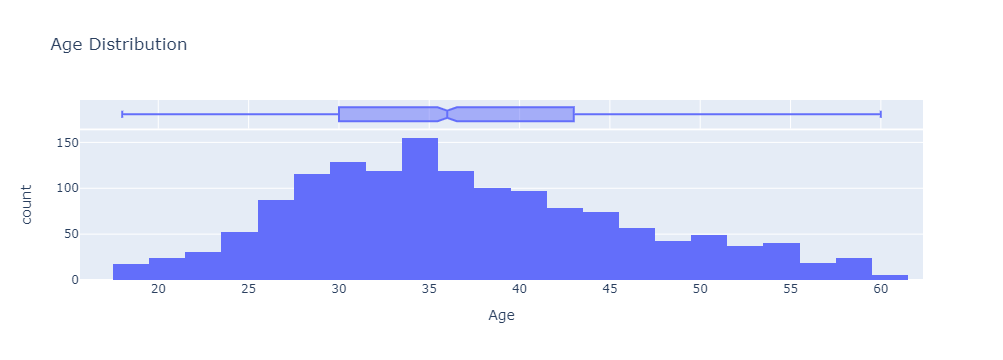

In [220]:
# Age distribution
fig = px.histogram(data, x='Age', nbins=30, title='Age Distribution', marginal='box', hover_data=data.columns)
fig.show()

The age distribution histogram shows the frequency of different ages among employees.
Key insights:
The majority of employees are between 30 and 40 years old.
There are fewer employees at the extremes (younger than 25 and older than 55).

### Attrition Distribution

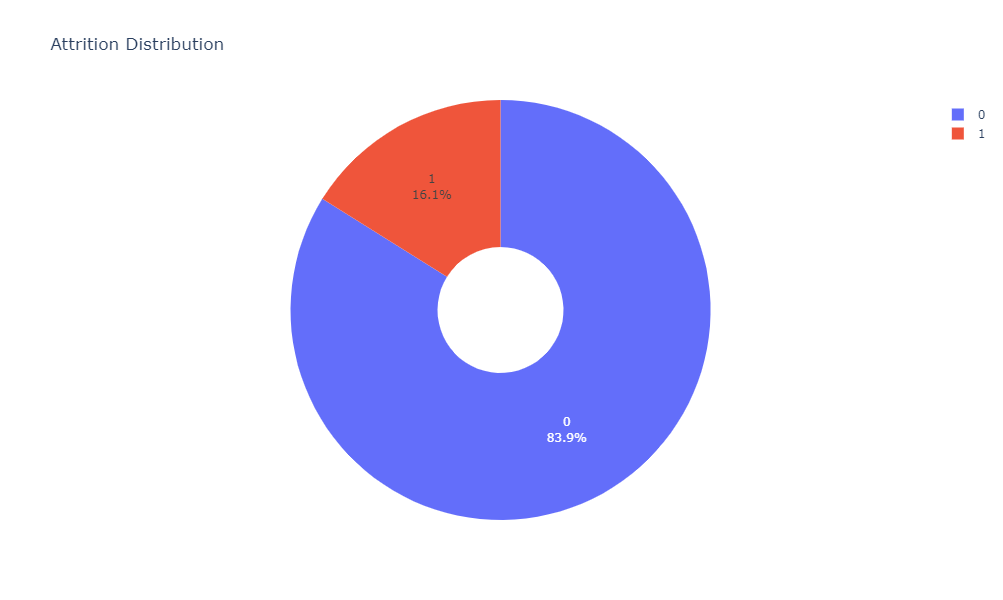

In [165]:
# Create a pie chart for Attrition distribution
fig = px.pie(
    data, 
    names='Attrition', 
    title='Attrition Distribution', 
    labels={'Attrition':'Attrition (0 = No, 1 = Yes)'}, 
    hole=0.3
)

# Add count labels to the pie chart
fig.update_traces(textinfo='percent+label', textposition='inside')

# Ensure the chart is displayed in a square format
fig.update_layout(width=600, height=600)

fig.show()

This histogram shows the distribution of attrition (0 = No, 1 = Yes).
Key insights:
A significantly higher number of employees have not left the company (attrition = 0).
This indicates a relatively low attrition rate.

### Correlation Matrix 

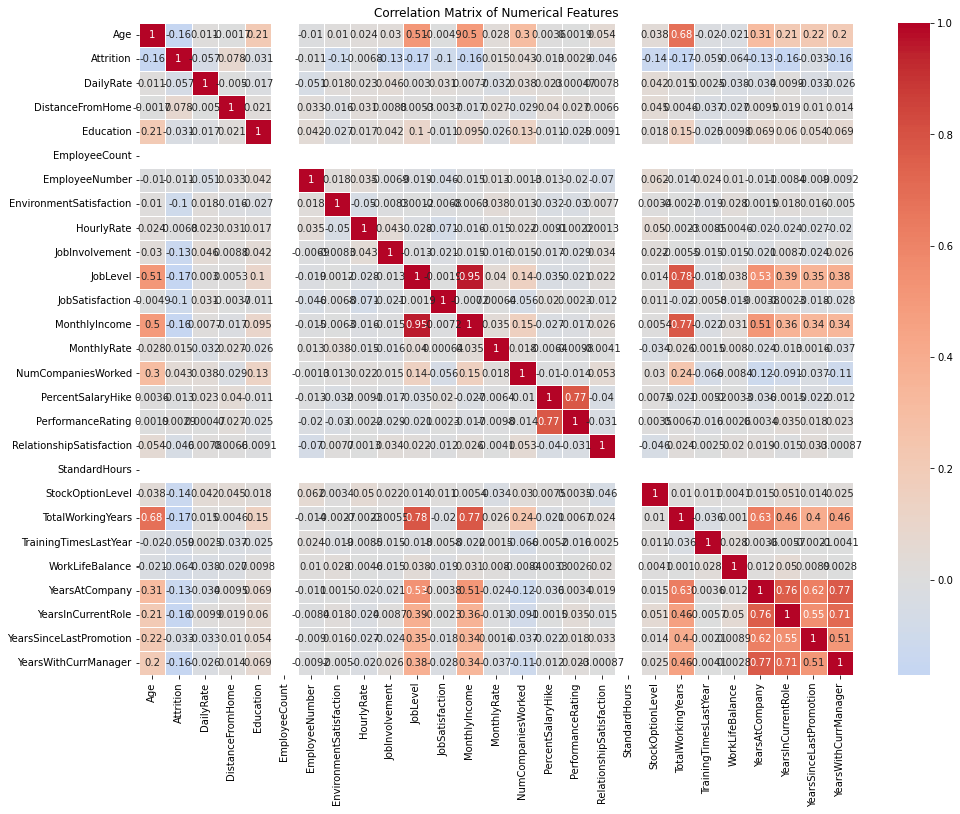

In [109]:
corr_matrix = data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**The correlation heatmap shows the pairwise correlations between features**

Key insights:
Strong correlations can be observed between some features, such as 'MonthlyIncome' and 'JobLevel'.
'Attrition' has weak correlations with most features, indicating no single feature strongly predicts attrition.

### Monthly Income vs. Age colored by Attrition:

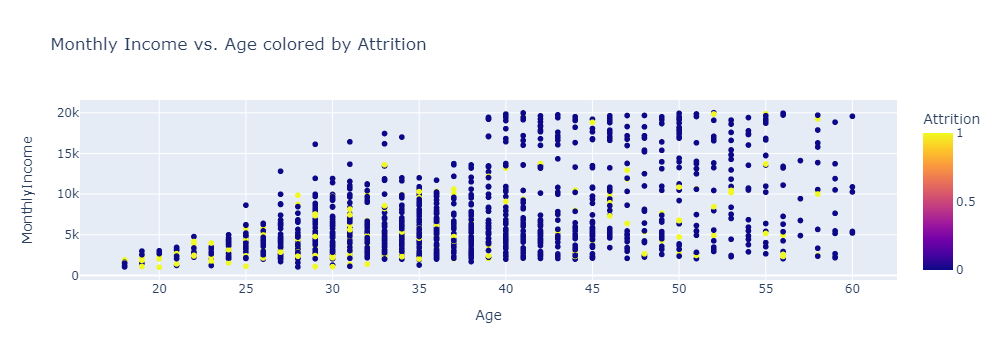

In [110]:
# Monthly Income vs. Age colored by Attrition
hover_data_cols = [col for col in data.columns if col.startswith('JobRole') or col.startswith('Department')]
fig = px.scatter(data, x='Age', y='MonthlyIncome', color='Attrition', title='Monthly Income vs. Age colored by Attrition', hover_data=hover_data_cols)
fig.show()

This scatter plot shows the relationship between age and monthly income, colored by attrition status.

Key insights:
Higher-income employees tend to have lower attrition rates.
Younger employees (under 30) have higher attrition rates regardless of income.

### Job Satisfaction Distribution 

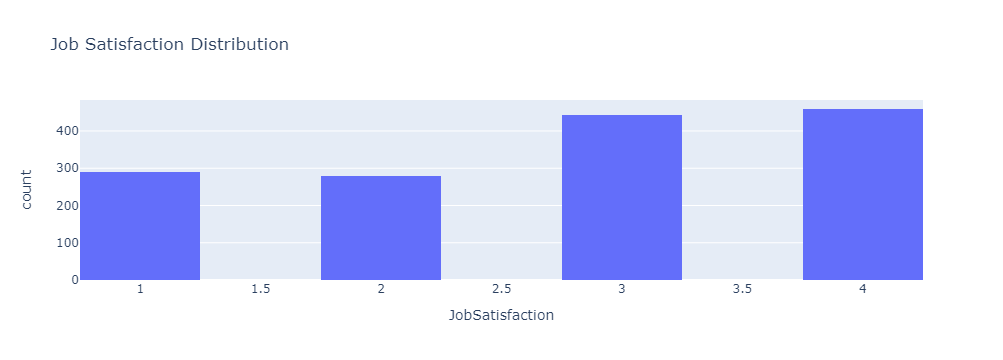

In [111]:
# Job Satisfaction distribution
fig = px.histogram(data, x='JobSatisfaction', nbins=10, title='Job Satisfaction Distribution')
fig.show()

This histogram displays the distribution of job satisfaction levels among employees.

Key insights:
Job satisfaction ratings are fairly evenly distributed, with a slight peak at the highest satisfaction level.

### Years at Company vs. Years in Current Role colored by Attrition

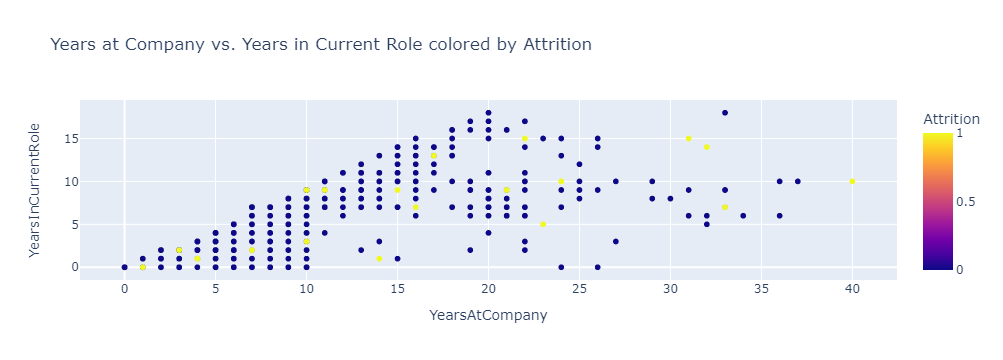

In [112]:
# Years at Company vs. Years in Current Role colored by Attrition
fig = px.scatter(data, x='YearsAtCompany', y='YearsInCurrentRole', color='Attrition', title='Years at Company vs. Years in Current Role colored by Attrition', hover_data=hover_data_cols)
fig.show()

This scatter plot shows the relationship between years at the company and years in the current role, colored by attrition status.

Key insights:
Employees who have spent fewer years in their current role and at the company have higher attrition rates.
Longer tenure in the same role appears to correlate with lower attrition.

## Data Preprocessing 

In [113]:
# Preprocess the data
data['Attrition'] = LabelEncoder().fit_transform(data['Attrition'])
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [114]:
# Split the data into features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [115]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [180]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Addressing Class Imbalance using Undersampling

Text(0, 0.5, 'Count')

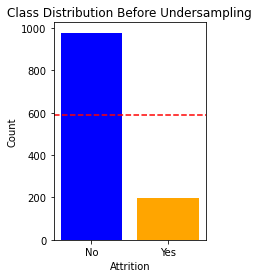

In [181]:
# Plot before undersampling
plt.subplot(1, 2, 1)
class_counts_before = y_train.value_counts()
plt.bar(['No', 'Yes'], [class_counts_before[0], class_counts_before[1]], color=['blue', 'orange'])
plt.axhline(y=class_counts_before.mean(), color='r', linestyle='--')
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Attrition')
plt.ylabel('Count')

In [182]:
# Apply RandomUnderSampler to the training data
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

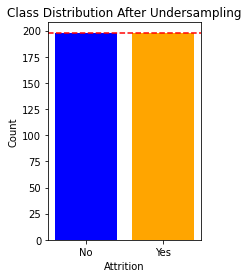

In [183]:
# Plot after undersampling
plt.subplot(1, 2, 2)
class_counts_after = y_train_under.value_counts()
plt.bar(['No', 'Yes'], [class_counts_after[0], class_counts_after[1]], color=['blue', 'orange'])
plt.axhline(y=class_counts_after.mean(), color='r', linestyle='--')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Attrition')
plt.ylabel('Count')

Encoding categorical variables, scaling features, and splitting the data into training and testing sets ensure the data is ready for modeling.

## Model Training with Hyperparameter Tuning

In [207]:
# Model Training with Hyperparameter Tuning
# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [208]:
# Initialize and fit the model
svc = SVC(probability=True)
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [209]:
# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


The hyperparameter tuning process identifies the best combination of parameters ('C' and 'gamma') for the SVC model.

The best parameters found for this dataset are used to optimize the model's performance.

##  Evaluation

In [210]:
# Model Evaluation
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)
y_pred_proba = best_svc.predict_proba(X_test)[:, 1]

In [211]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7380952380952381


### Confusion Matrix

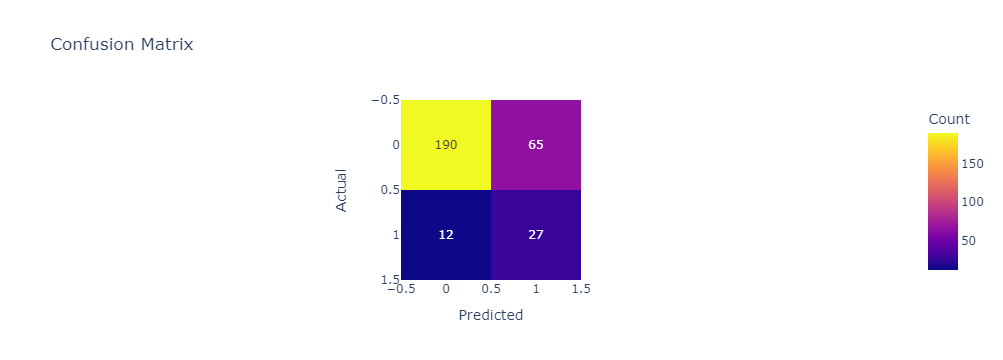

In [212]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig = px.imshow(conf_matrix, text_auto=True, title='Confusion Matrix', labels=dict(x='Predicted', y='Actual', color='Count'))
fig.show()

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.

Key insights:
The majority of predictions are true negatives, indicating the model is good at predicting non-attrition.
There are some false negatives, which are critical to reduce in attrition prediction.

### ROC Curve

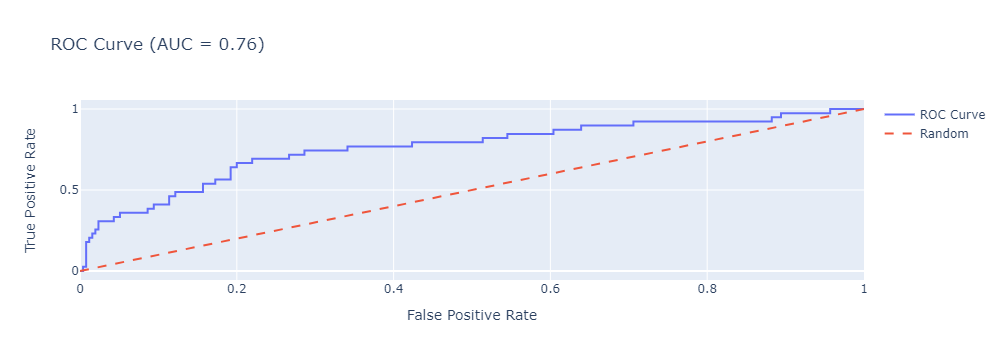

In [213]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))
fig.update_layout(title=f'ROC Curve (AUC = {roc_auc:.2f})', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

The ROC curve illustrates the true positive rate (sensitivity) vs. the false positive rate (1-specificity).

Key insights:
The area under the curve (AUC) is a measure of the model's ability to distinguish between classes.
An AUC close to 1 indicates a good model.

### Classification Report

In [214]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       255
           1       0.29      0.69      0.41        39

    accuracy                           0.74       294
   macro avg       0.62      0.72      0.62       294
weighted avg       0.85      0.74      0.78       294



The classification report provides precision, recall, f1-score, and support for each class.
Key insights:
High precision and recall for the non-attrition class indicate the model's robustness in predicting employees who stay.
The attrition class has lower precision and recall, suggesting room for improvement.

### Actual VS Predicted

In [215]:
# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Filter the DataFrame to show only the rows where mistakes were made
mistakes = results[results['Actual'] != results['Predicted']]

# Display the head of the mistakes DataFrame
print(mistakes)

      Actual  Predicted
494        0          1
430        0          1
665        0          1
617        0          1
1244       0          1
...      ...        ...
1131       0          1
196        0          1
354        0          1
316        0          1
1070       0          1

[77 rows x 2 columns]


Correct Predictions: 217
Mistakes: 77
Ratio of Correct Predictions to Mistakes: 2.8181818181818183


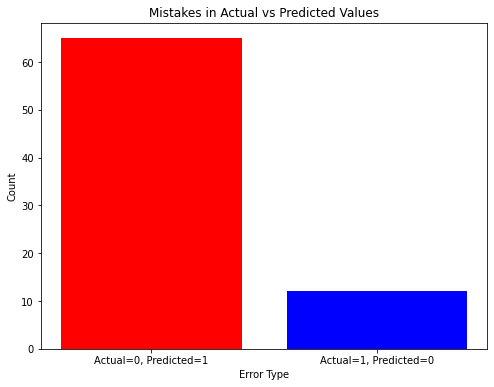

In [217]:
# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the number of correct predictions and mistakes
correct_predictions = results[results['Actual'] == results['Predicted']].shape[0]
mistakes = results[results['Actual'] != results['Predicted']].shape[0]

# Compute the ratio of correct predictions to mistakes
ratio = correct_predictions / mistakes if mistakes != 0 else 'Infinity'

# Display the results
print(f"Correct Predictions: {correct_predictions}")
print(f"Mistakes: {mistakes}")
print(f"Ratio of Correct Predictions to Mistakes: {ratio}")

# Plot the mistakes
mistake_counts = results[results['Actual'] != results['Predicted']].groupby(['Actual', 'Predicted']).size().reset_index(name='Count')

plt.figure(figsize=(8, 6))
plt.bar(mistake_counts.index, mistake_counts['Count'], color=['red', 'blue'])
plt.xticks(mistake_counts.index, [f"Actual={row['Actual']}, Predicted={row['Predicted']}" for _, row in mistake_counts.iterrows()])
plt.title('Mistakes in Actual vs Predicted Values')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.show()